In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
# =============================
# 1. Data Loading and Exploration
# =============================

# Load the dataset ("vg_sales.csv")
data = pd.read_csv("vg_sales.csv")  # Ensure the file path is correct

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Summary statistics and missing values
print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values by Column:")
print(data.isnull().sum())

# Drop rows missing critical information ('Year' or 'Global_Sales')
data = data.dropna(subset=["Year", "Global_Sales"])

# Convert 'Year' to integer (if not already)
data["Year"] = data["Year"].astype(int)


Dataset Head:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Summary Statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16

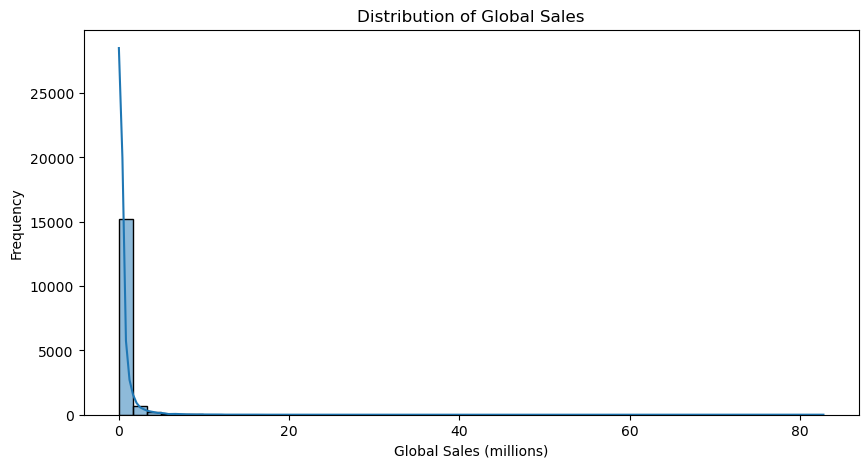

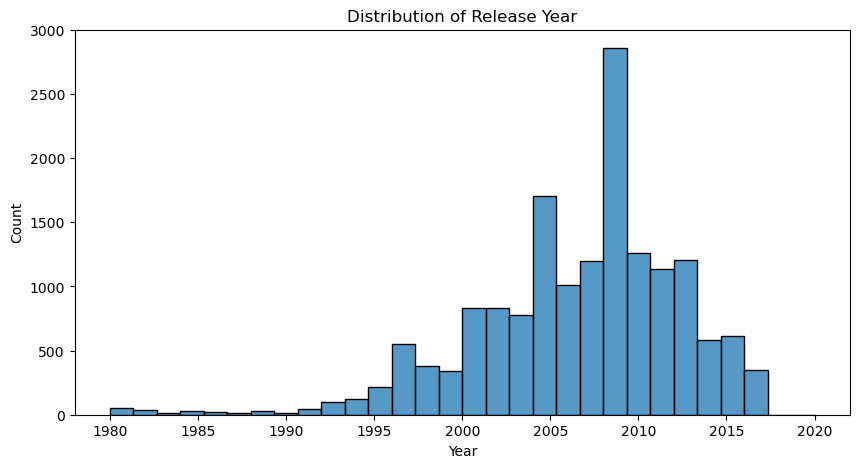

In [27]:
# Visualize the distribution of Global_Sales
plt.figure(figsize=(10, 5))
sns.histplot(data['Global_Sales'], bins=50, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Frequency")
plt.show()

# Visualize the distribution of the release Year
plt.figure(figsize=(10, 5))
sns.histplot(data['Year'], bins=30, kde=False)
plt.title("Distribution of Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

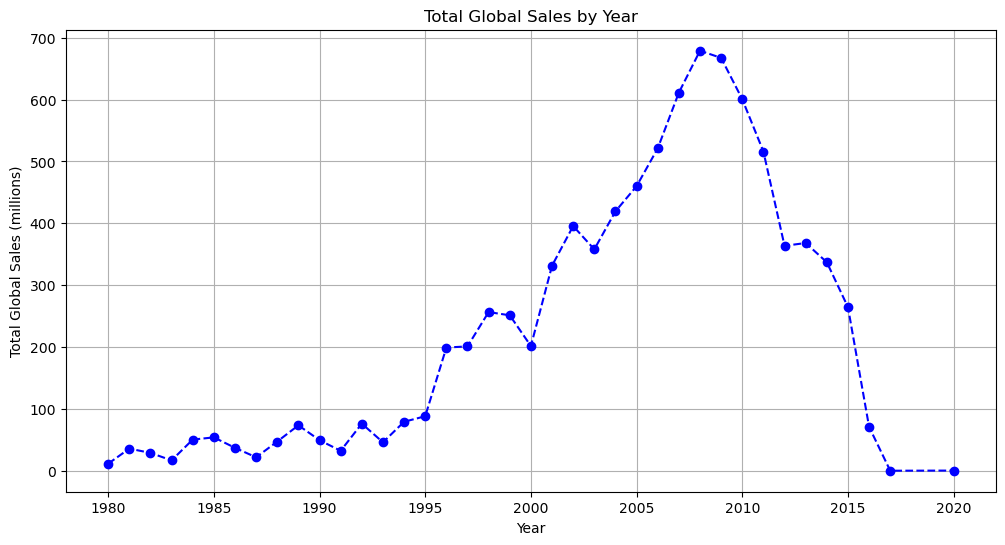

In [29]:
# Aggregate global sales by Year
agg_sales = data.groupby("Year")["Global_Sales"].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(agg_sales["Year"], agg_sales["Global_Sales"], marker="o", linestyle="--", color="b")
plt.title("Total Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Global Sales (millions)")
plt.grid(True)
plt.show()

In [31]:
# For regression, 'Year' is used as the predictor variable and 'Global_Sales' is used as the target variable.
X = data[["Year"]]
y = data["Global_Sales"]

# Splits the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the Linear Regression model
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print("Linear Regression Performance:")
print(f"  RMSE: {rmse_lin:.4f}")
print(f"  MAE:  {mae_lin:.4f}")

Linear Regression Performance:
  RMSE: 2.0669
  MAE:  0.6160


In [35]:
# Model 2: Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("\nRandom Forest Regression Performance:")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  MAE:  {mae_rf:.4f}")


Random Forest Regression Performance:
  RMSE: 2.0655
  MAE:  0.6022


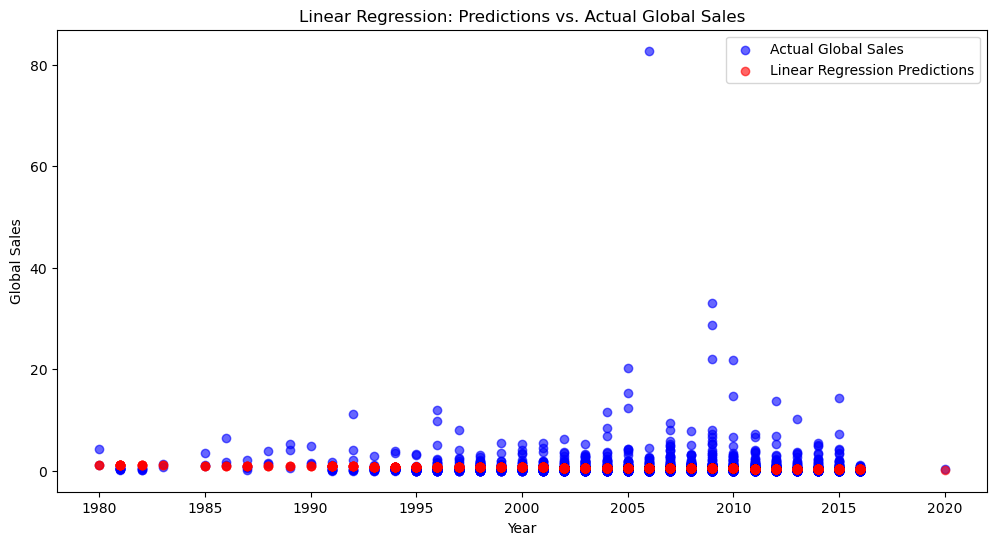

In [37]:
# Plot predictions vs. actual values for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Actual Global Sales")
plt.scatter(X_test, y_pred_lin, color="red", alpha=0.6, label="Linear Regression Predictions")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Linear Regression: Predictions vs. Actual Global Sales")
plt.legend()
plt.show()

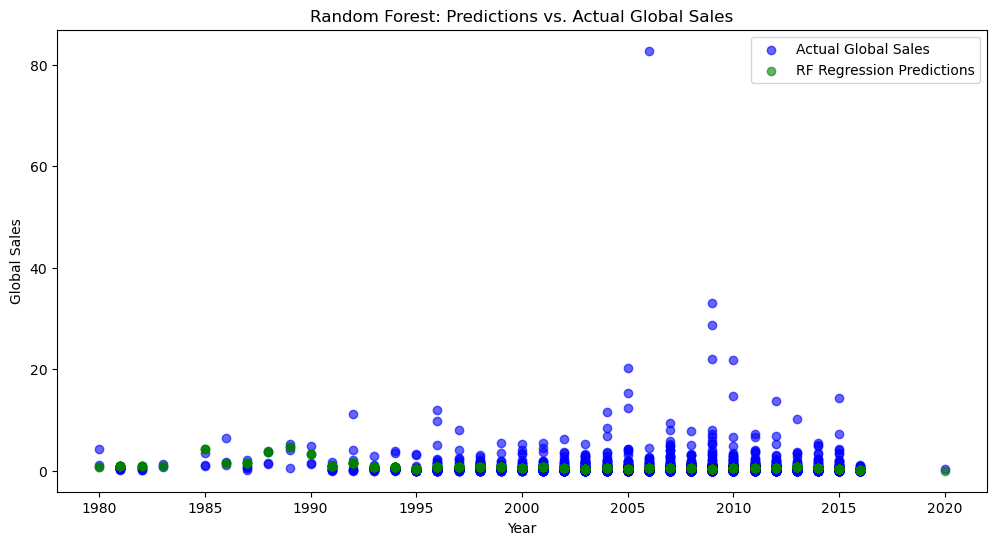

In [39]:
# Plot predictions vs. actual values for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Actual Global Sales")
plt.scatter(X_test, y_pred_rf, color="green", alpha=0.6, label="RF Regression Predictions")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Random Forest: Predictions vs. Actual Global Sales")
plt.legend()
plt.show()

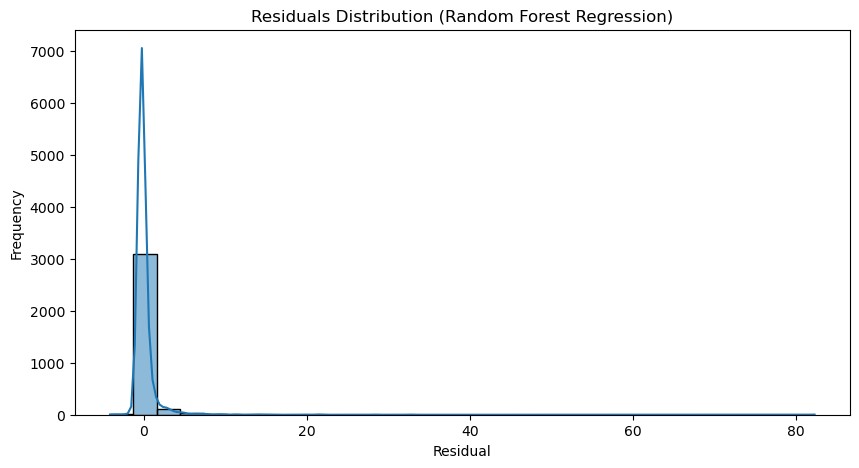

In [41]:
# Residual Analysis for the Random Forest model
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Random Forest Regression)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()